This analysis is in the order of Female then Male

In [1]:
install.packages('qtl') #Main package, for analysis
install.packages('qtlcharts') #accessory, for displaying graphs
install.packages('LinkageMapView') #accessory, for displaying linkage maps
install.packages('rcompanion')# for plotNormalHistogram

Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'qtl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Courtney\Documents\R\win-library\3.6\00LOCK\qtl\libs\x64\qtl.dll to C:\Users\Courtney\Documents\R\win-library\3.6\qtl\libs\x64\qtl.dll: Permission denied"
Warning message:
"restored 'qtl'"



The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpsVhQvD\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtlcharts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpsVhQvD\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'LinkageMapView' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpsVhQvD\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'rcompanion' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpsVhQvD\downloaded_packages


In [12]:
library(qtl) #load packages
library(qtlcharts)
library(LinkageMapView)
library(rcompanion)

In [13]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  FemaleMap.csv
First Genotype (homozygous) (For example ll):  ll
Second Genotype (heterozygous) (for example lm):  lm
Column Number:  21


 --Read the following data:
	 294  individuals
	 1100  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,2,4,5,7,8,9,10,11,12,13,14,16,17,18,19; use jittermap()."


 --Cross type: bc 


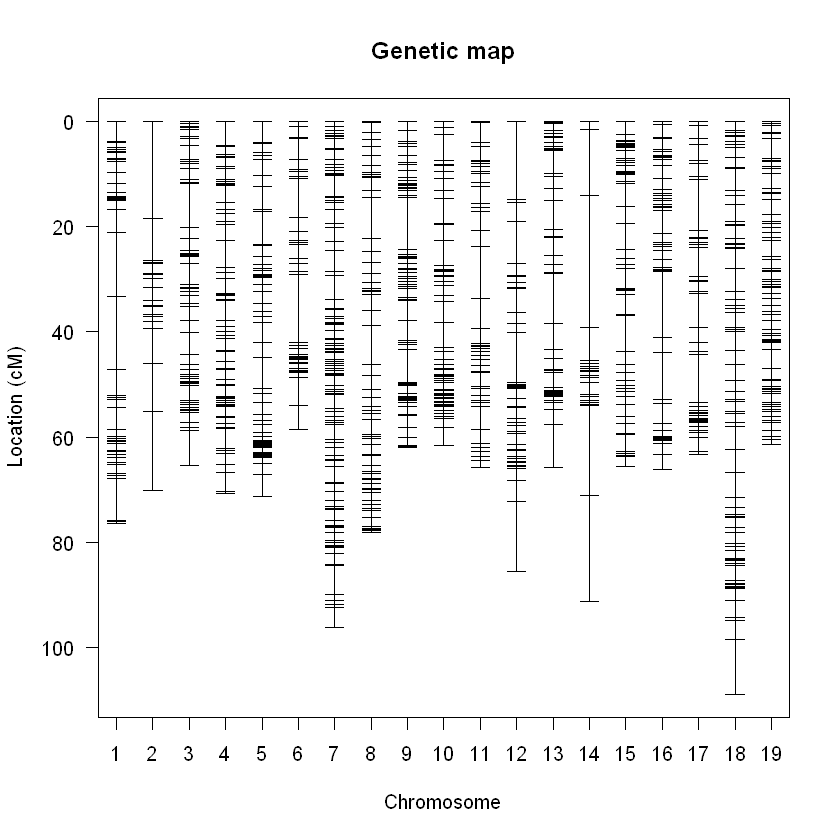

In [14]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

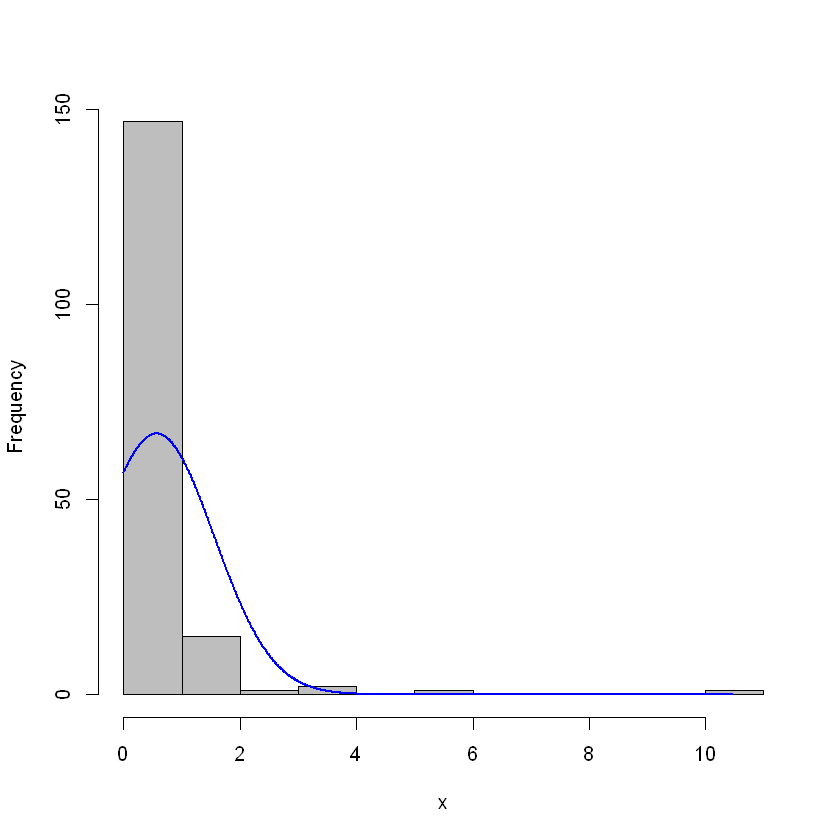

In [15]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this dataset. Will need to be analyized. 

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addc

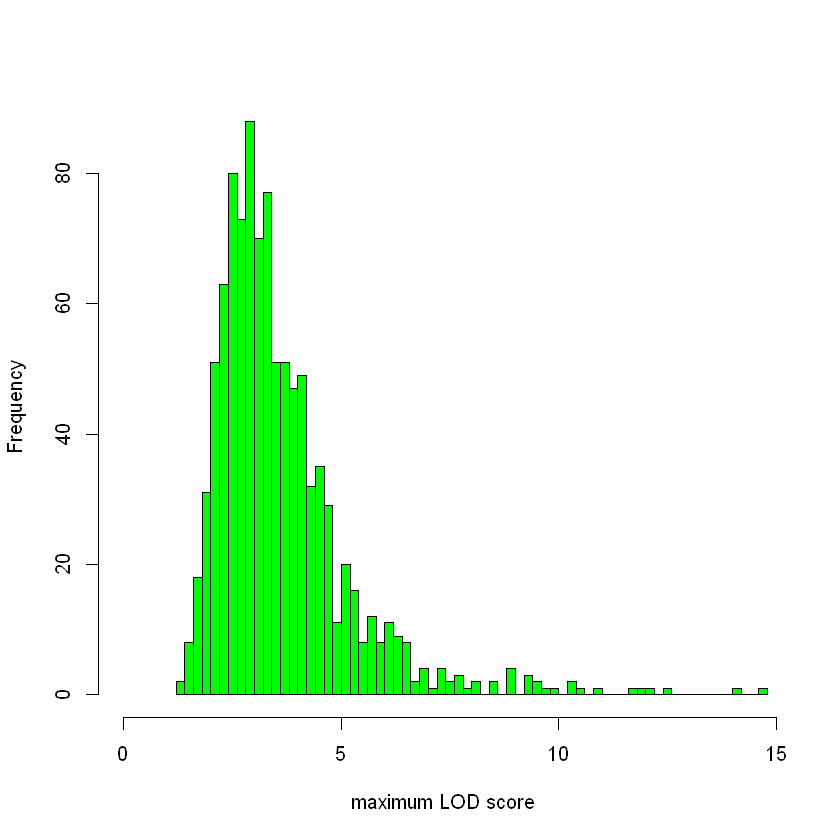

In [16]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
7_7311056,1,33.364022,0.7541122
c2.loc48,2,48.000000,0.3821707
c3.loc32,3,32.000000,0.9500168
4_21750541,4,65.253062,2.4076683
5_2074832,5,6.431004,1.1149931
6_17440350,6,42.052019,1.3795023
7_2682789,7,8.753014,0.6808505
c8.loc60,8,60.000000,1.4690249
9_13407438,9,50.029053,1.1929107


LOD thresholds (1000 permutations)
   [,1]
5% 6.38
1% 9.94

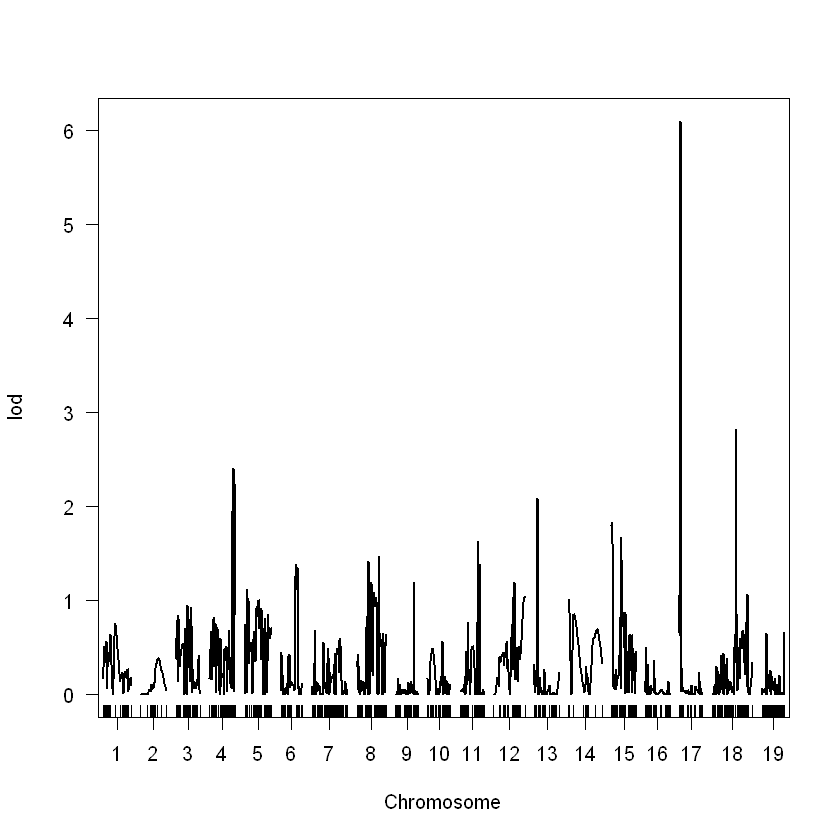

In [17]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)
summary(TraitCIM1000,alpha=c(.05,.01))

Chromosome?  17


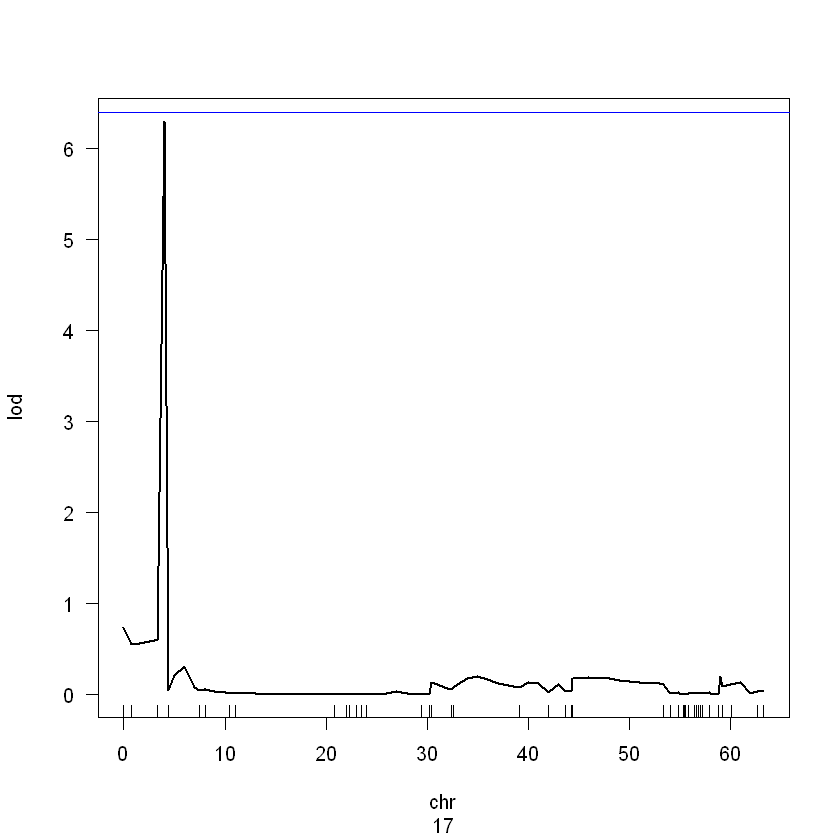

In [8]:
#Chromosomal Analysis
chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
plot(TraitCIM, chr = chr,xlab = c("chr",chr)) #Plot chr LOD scores
abline(h = LOD5, col = "blue") #Statistically Significant

In [9]:
bayesint(TraitCIM, chr = chr, prob=0.95, expandtomarkers=TRUE) #calculate bayesian interval
lodint(TraitCIM, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
17_1975198,17,3.267002,0.59823581
c17.loc4,17,4.000000,6.29854897
17_2342835,17,4.358003,0.04869467


,chr,pos,lod
,<fct>,<dbl>,<dbl>
17_1975198,17,3.267002,0.59823581
c17.loc4,17,4.000000,6.29854897
17_2342835,17,4.358003,0.04869467


In [10]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  4.00000


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 127 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 167 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df        SS         MS      LOD     %var Pvalue(Chi2)    Pvalue(F)
Model   1  30.32324 30.3232373 7.379301 18.41222 5.559747e-09 7.214544e-09
Error 165 134.36762  0.8143492                                            
Total 166 164.69086                                                       


Estimated effects:
-----------------
               est       SE      t
Intercept  0.52947  0.07002  7.562
17@4.0    -5.98717  0.98116 -6.102


In [34]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  MaleMap.csv
First Genotype (homozygous) (For example ll):  nn
Second Genotype (heterozygous) (for example lm):  np
Column Number:  21


 --Read the following data:
	 294  individuals
	 1128  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19; use jittermap()."


 --Cross type: bc 


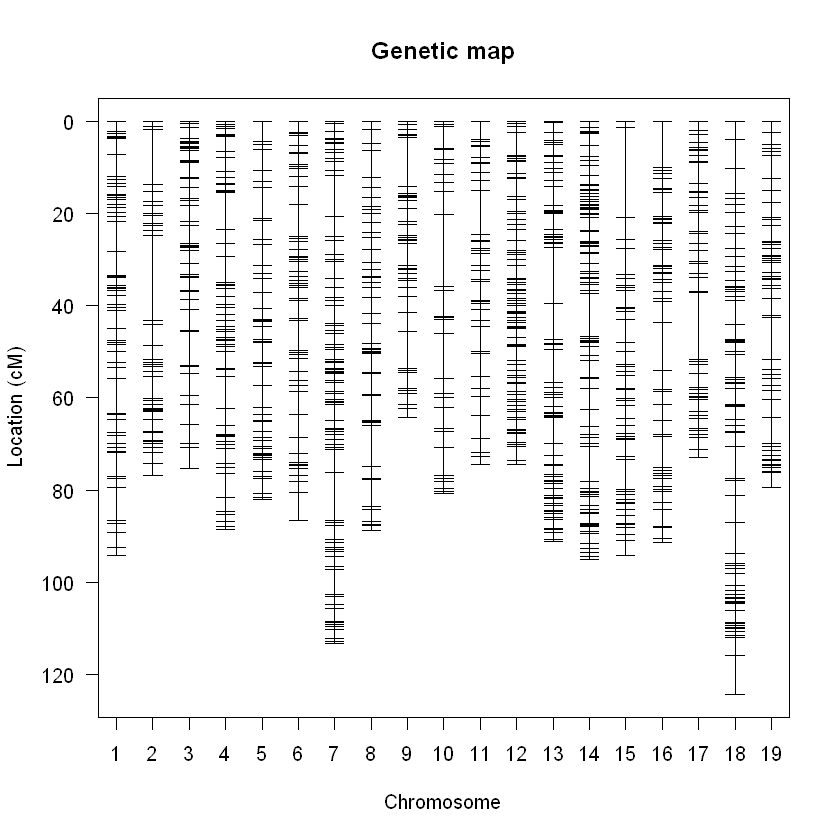

In [35]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

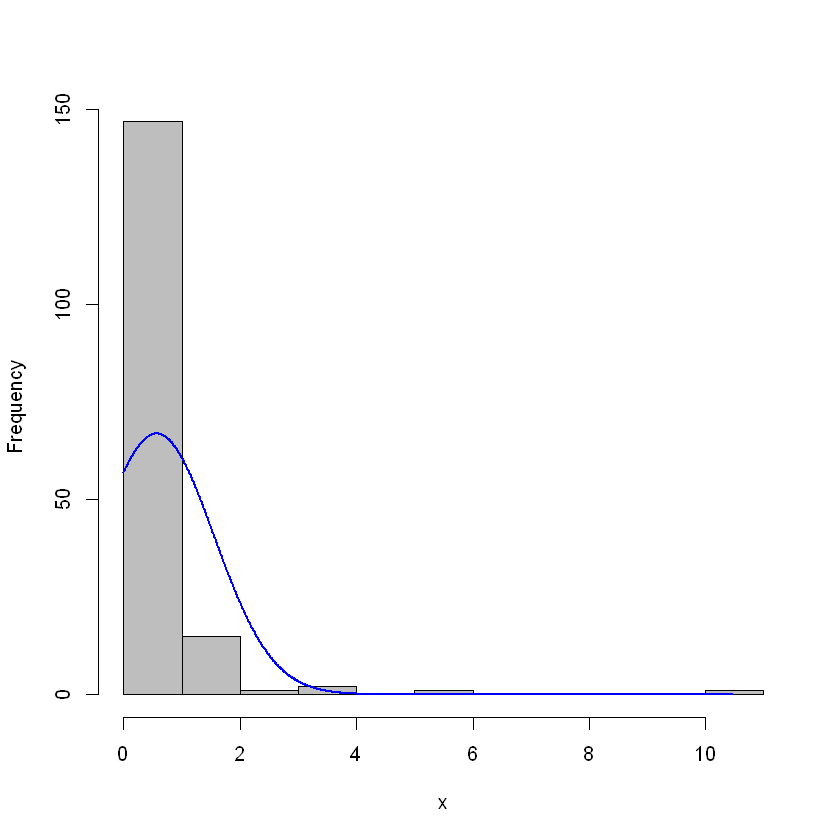

In [36]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this data. 

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"


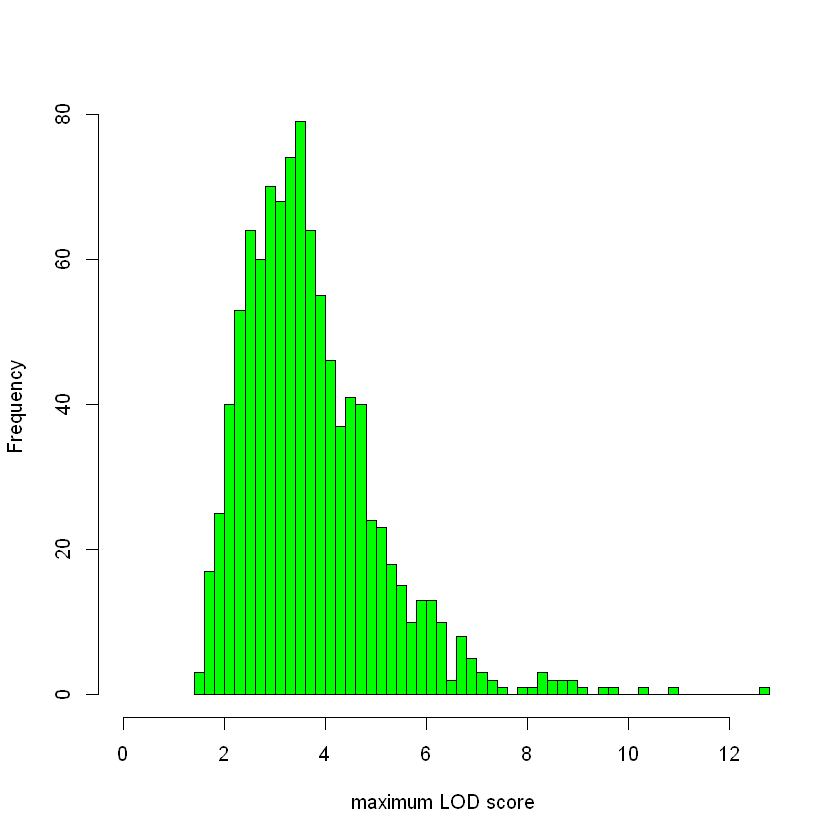

In [37]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc39,1,39.000000,1.8398948
2_17017117,2,67.249034,1.8706455
3_969615,3,4.718006,1.1503656
c4.loc53,4,53.000000,1.1225662
5_23031683,5,72.299046,1.0537561
c6.loc16,6,16.000000,0.6574418
c7.loc51,7,51.000000,1.0325740
c8.loc19,8,19.000000,4.1023224
9_4309236,9,18.987014,0.5979394


LOD thresholds (1000 permutations)
   [,1]
5% 6.17
1% 8.54

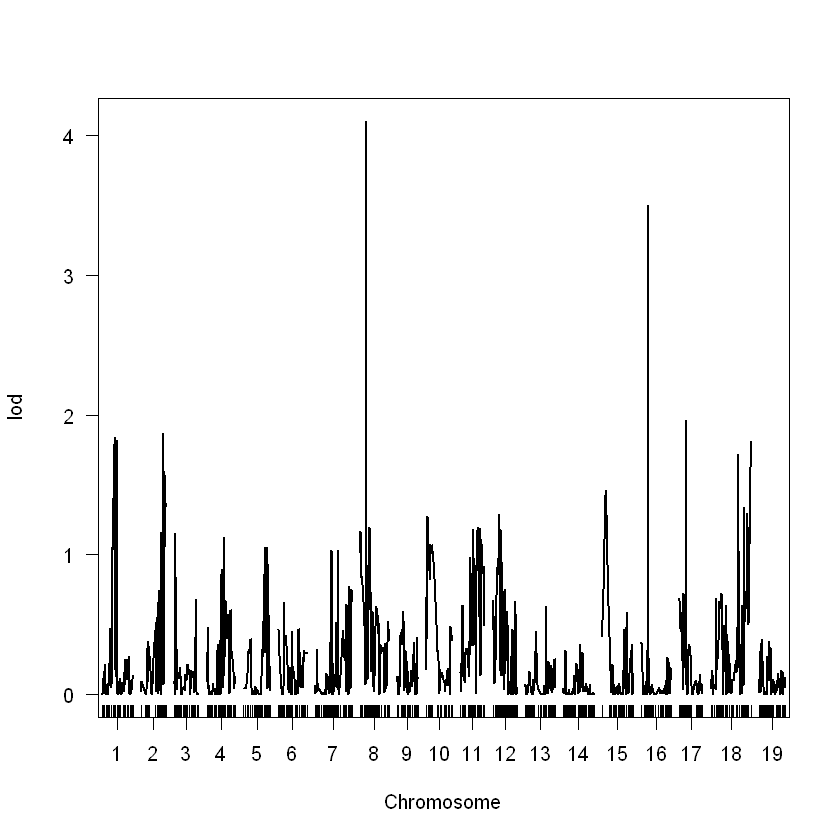

In [38]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)
summary(TraitCIM1000,alpha=c(.05,.01))

Chromosome?  8
Would you like to investigate 
                  another chromosome? (Y/N):  N


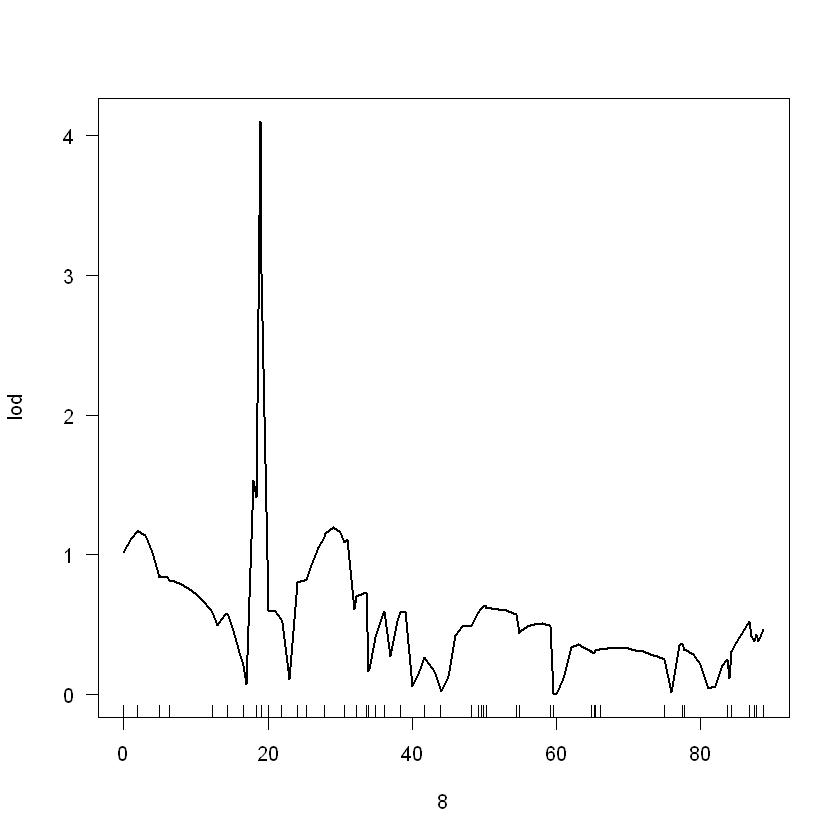

In [40]:
#Chromosomal Analysis
cont = 'Y' #Run loop on first run through
while(cont == 'Y'){
  chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
  plot(TraitCIM, chr = chr, xlab=chr) #Plot chr LOD scores
  abline(h = LOD5, col = "blue") #Statistically Significant
  cont = readline("Would you like to investigate 
                  another chromosome? (Y/N): ") #Y if multiple
                  #chromosomes are to be investigated
}